In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


from plotting_functions import *
import math
import csv
import time
from math import log
import networkx as nx
from os import listdir
import random
import io
from io import StringIO
import codecs
import math
from os.path import isfile, join
#from geopy.distance.geodesic import vincenty
# In[2]:
from math import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset, InsetPosition

In [ ]:
def get_avg_epr_pairs_DEJMPS(F_init,F_target):
    F_curr = F_init
    F2 = F3 = F4 = (1-F_curr)/3
    n_avg = 1.0
    while(F_curr < F_target):
        F_curr,F2, F3, F4, succ_prob = get_next_fidelity_and_succ_prob_DEJMPS(F_curr, F2, F3, F4)
        n_avg = n_avg*(2/succ_prob)
    return  n_avg
    
def get_next_fidelity_and_succ_prob_DEJMPS(F1,F2,F3,F4):
    succ_prob = (F1+F2)**2 + (F3+F4)**2
    output_fidelity1 = (F1**2 + F2**2)/succ_prob
    output_fidelity2 = (2*F3*F4)/succ_prob
    output_fidelity3 = (F3**2 + F4**2)/succ_prob
    output_fidelity4 = (2*F1*F2)/succ_prob

    return output_fidelity1, output_fidelity2, output_fidelity3, output_fidelity4, succ_prob 


for link_level_Fth in [0.9]:
    each_scheme_link_lenght_covered_distance = {}
    selected_values = []
    scheme_keys = []
    d_values = set([])
    for d in range(10,200,5):
        for R_min in range(1,100,30):
            c = 1
            etha = 10**(-0.1*0.2*d)
            T=1 * 10**(-3)
            alpha = 1
            capacity = 5*round((2*c*etha*alpha)/T,3)
            link_F  = 0.94
            target_F = 0.9
            one_before_end_swap_F  = (link_level_Fth)*((4*link_level_Fth-1)/3)
            after_swap_F = link_level_Fth
            final_n_avg = get_avg_epr_pairs_DEJMPS(link_level_Fth ,target_F)
            counter = 0
            if final_n_avg>=capacity:
                covered_distance = d
            else:
                covered_distance = 0
            print("d %s capacity %s link_F %s link_Fth %s after swap F %s target %s final_n_avg %s "%(d,capacity,link_F,link_level_Fth,one_before_end_swap_F,target_F,final_n_avg))
            while(capacity-final_n_avg>R_min):
                n_avg = get_avg_epr_pairs_DEJMPS(after_swap_F ,link_level_Fth)
                counter+=1
                capacity = capacity-n_avg
                after_swap_F= (link_level_Fth)*((4*link_level_Fth-1)/3)
#                 print("R_min %s one swap happened consumed %s new capacity %s "%(R_min,n_avg,capacity),end="\r")
            covered_distance = counter*2
            scheme = "nested, R_min="+str(R_min)
            print("for scheme %s covered_distance is %s "%(scheme,covered_distance))
            if scheme not in scheme_keys:
                scheme_keys.append(scheme)
            try:
                each_scheme_link_lenght_covered_distance[scheme][d] = covered_distance
            except:
                each_scheme_link_lenght_covered_distance[scheme] = {}
                each_scheme_link_lenght_covered_distance[scheme][d] = covered_distance
            selected_values.append(covered_distance)
            d_values.add(d)

    d_values  = list(d_values)
    d_values.sort()
    ploting_simple_y_as_x("Link length (d in km)","number of nodes",
                            18, 18, 14,
                          14, 0, 0,
                          0,0,False,[],max(selected_values)+10,

                          list(scheme_keys),
                          each_scheme_link_lenght_covered_distance,
                          d_values,d_values,
                          False,True,True,1,14,
                          "plots/scalability_results"+str(link_level_Fth)+".pdf",True,2,9.4,3.8,True)

In [ ]:
d_values = set(d_values)
for link_level_Fth in [0.9]:
    for d in range(10,200,5):
        for R_min in range(1,100,30):
            c = 1
            etha = 10**(-0.1*0.2*d)
            T=1 * 10**(-3)
            alpha = 1
            capacity = 5*round((2*c*etha*alpha)/T,3)
            link_F  = 0.94
            target_F = 0.9
            one_before_end_swap_F  = (link_level_Fth)*((4*link_level_Fth-1)/3)
            after_swap_F = link_level_Fth
            final_n_avg = get_avg_epr_pairs_DEJMPS(link_level_Fth ,target_F)
            counter = 0
            if final_n_avg>=capacity:
                covered_distance = d
            else:
                covered_distance = 0
            print("d %s capacity %s link_F %s link_Fth %s after swap F %s target %s final_n_avg %s "%(d,capacity,link_F,link_level_Fth,one_before_end_swap_F,target_F,final_n_avg))
            while(capacity-final_n_avg>R_min):
                n_avg = get_avg_epr_pairs_DEJMPS(after_swap_F ,link_level_Fth)
                counter+=1
                capacity = capacity-n_avg
                after_swap_F= (link_level_Fth)*((4*link_level_Fth-1)/3)
#                 print("R_min %s one swap happened consumed %s new capacity %s "%(R_min,n_avg,capacity),end="\r")
            covered_distance = counter
            scheme = "sequential, R_min="+str(R_min)
            print("for scheme %s covered_distance is %s "%(scheme,covered_distance))
            if scheme not in scheme_keys:
                scheme_keys.append(scheme)
            try:
                each_scheme_link_lenght_covered_distance[scheme][d] = covered_distance
            except:
                each_scheme_link_lenght_covered_distance[scheme] = {}
                each_scheme_link_lenght_covered_distance[scheme][d] = covered_distance
            selected_values.append(covered_distance)
            d_values.add(d)

    d_values  = list(d_values)
    d_values.sort()
    ploting_simple_y_as_x("Link length (d in km)","Number of nodes",
                            18, 18, 14,
                          14, 0, 0,
                          0,0,False,[],max(selected_values)+10,

                          list(scheme_keys),
                          each_scheme_link_lenght_covered_distance,
                          d_values,d_values,
                          False,True,True,1,14,
                          "plots/n_results"+str(link_level_Fth)+".pdf",True,2,9.4,3.8,True)

In [ ]:
ploting_simple_y_as_x("Link length (d in km)","Covered distance (km)",
                            18, 18, 14,
                          14, 0, 0,
                          0,0,False,[],max(selected_values)+10,

                          list(scheme_keys),
                          each_scheme_link_lenght_covered_distance,
                          d_values,d_values,
                          False,True,True,1,14,
                          "plots/scalability_results"+str(link_level_Fth)+".pdf",True,2,9.4,3.8,True)

In [ ]:

scheme_keys = set([])
τ_coh_values  =set([])
each_scheme_each_coherence_time_all_workloads = {}
each_scheme_each_coherence_time_workloads  ={}

# result_file_path = "../../QSN_results/QSN_resultsv3.csv" #for intermediate edge capacity 300 EPRps
# result_file_path = "../../QSN_results/QSN_resultsv2.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_finalv2.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate.csv" #for intermediate edge capacity 100 EPRps



with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = float(line[6])
        objective_value = float(line[7])
#         print("objective_value",objective_value)
        if objective_value==-1:
            objective_value = 0
        else:
            objective_value = 1
        if  ( t_max in [10] and request_fidelity_threshold in [0.8]  and 
             storage_block_threshold in [0.7,0.8,0.85,0.9]
            ):
            scheme = "Strg_Fth = "+str(storage_block_threshold)+",Stg_C="+str(storage_capacity)+",delat"+str(delta)
            try:
                each_scheme_each_coherence_time_workloads[scheme][τ_coh]+=objective_value
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]= objective_value
                except:
                    each_scheme_each_coherence_time_workloads[scheme]={}
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]=objective_value
            try:
                each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]+=1
            except:
                try:
                    each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]= 1
                except:
                    each_scheme_each_coherence_time_all_workloads[scheme]={}
                    each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]=1
         
            τ_coh_values.add(τ_coh)
            if scheme not in scheme_keys:
                scheme_keys.add(scheme)


selected_values = []
each_scheme_each_coherence_time_workloads_percentage = {}
for scheme,τ_coh_value_satisfied_number in each_scheme_each_coherence_time_workloads.items():
    for τ_coh,satisfied_number in τ_coh_value_satisfied_number.items():
        
        percentage = satisfied_number/each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]*100
        try:
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh] = percentage
        except:
            each_scheme_each_coherence_time_workloads_percentage[scheme]  ={}
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh]=percentage
        selected_values.append(percentage)
        
        
τ_coh_values = list(τ_coh_values)
τ_coh_values.sort()
scheme_keys = list(scheme_keys)

ploting_simple_y_as_x("Coherence time (sec)","Percentage of satisfied workloads",
                        18, 18, 14,
                      14, 0, 0,
                      0,0,False,[],max(selected_values)+10,
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      False,True,True,6,2,
                      "plots/QSN_repeater_chain_workload_as_coh_time.pdf",True,2,6.4,3.8,False)

[2.0]
[30]
we get the values for scheme model:worst,Req.Fth=0.9 point 0.1 64.278116081434
we get the values for scheme model:worst,Req.Fth=0.9 point 0.30526315789473685 64.278116081434
we get the values for scheme model:worst,Req.Fth=0.9 point 0.5105263157894737 64.278116081434
we get the values for scheme model:worst,Req.Fth=0.9 point 0.7157894736842105 64.278116081434
we get the values for scheme model:worst,Req.Fth=0.9 point 0.9210526315789473 64.278116081434
we get the values for scheme model:worst,Req.Fth=0.9 point 1.1263157894736844 64.278116081434
we get the values for scheme model:worst,Req.Fth=0.9 point 1.3315789473684212 64.278116081434
we get the values for scheme model:worst,Req.Fth=0.9 point 1.536842105263158 64.278116081434
we get the values for scheme model:worst,Req.Fth=0.9 point 1.7421052631578948 64.27819115968958
we get the values for scheme model:worst,Req.Fth=0.9 point 1.9473684210526316 64.27925520655113
we get the values for scheme model:worst,Req.Fth=0.9 point 2

/Users/shahrooz/PhD_research_projects/QSN/plotting/plotting_functions.py:335: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(y_axis_provided_min_value, y_axis_provided_max_value)


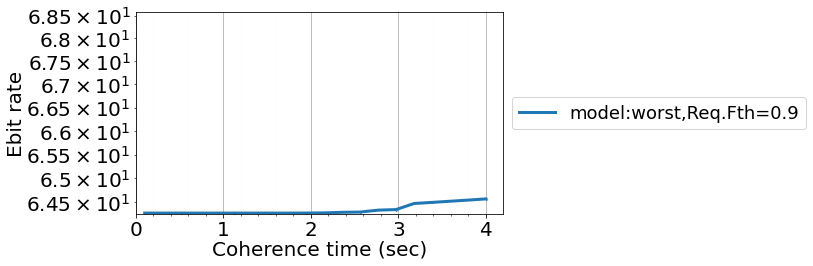

In [55]:
delta_values = set([])
scheme_keys = set([])
τ_coh_values  =set([])
t_max_values = set([])
each_scheme_each_coherence_time_all_workloads = {}
each_scheme_each_coherence_time_workloads  ={}

# result_file_path = "../../QSN_results/QSN_resultsv3.csv" #for intermediate edge capacity 300 EPRps
# result_file_path = "../../QSN_results/QSN_resultsv2.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate.csv" #for intermediate edge capacity 100 EPRps


result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate_doceherence_assumption.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate_doceherence_assumption_finalv6.csv" #for intermediate edge capacity 100 EPRps


with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = float(line[6])
        objective_value = float(line[7])
        edge_capacity = int(line[8])
        decoherence_assumption = line[11]
#         print("objective_value",objective_value)
        delta_values.add(delta)
        t_max_values.add(t_max)
        if  ( t_max in [30] and request_fidelity_threshold in [0.9]  and 
             storage_block_threshold in [0.9] and 
             delta in [2] and edge_capacity in [500] and storage_capacity in [10000]
            ):
            scheme = "model:"+str(decoherence_assumption)+",Req.Fth="+str(request_fidelity_threshold)
            try:
                each_scheme_each_coherence_time_workloads[scheme][τ_coh].append(objective_value)
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]= [objective_value]
                except:
                    each_scheme_each_coherence_time_workloads[scheme]={}
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]=[objective_value]
            
#             scheme2 = "No storage, Req.Fth="+str(request_fidelity_threshold)
#             no_storage_ebit_rate = 0.8822354464027311
#             try:
#                 each_scheme_each_coherence_time_workloads[scheme2][τ_coh].append(no_storage_ebit_rate)
#             except:
#                 try:
#                     each_scheme_each_coherence_time_workloads[scheme2][τ_coh]= [no_storage_ebit_rate]
#                 except:
#                     each_scheme_each_coherence_time_workloads[scheme2]={}
#                     each_scheme_each_coherence_time_workloads[scheme2][τ_coh]=[no_storage_ebit_rate]
#             if scheme2 not in scheme_keys:
#                 scheme_keys.add(scheme2)
            τ_coh_values.add(τ_coh)
            if scheme not in scheme_keys:
                scheme_keys.add(scheme)

print(list(delta_values))
print(list(t_max_values))
selected_values = []
each_scheme_each_coherence_time_workloads_percentage = {}
for scheme,τ_coh_value_satisfied_number in each_scheme_each_coherence_time_workloads.items():
    for τ_coh,values in τ_coh_value_satisfied_number.items():
        
        avg_EGR = sum(values)/len(values)
        try:
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh] = avg_EGR
        except:
            each_scheme_each_coherence_time_workloads_percentage[scheme]  ={}
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh]=avg_EGR
        selected_values.append(avg_EGR)
        
        
τ_coh_values = list(τ_coh_values)
τ_coh_values.sort()
scheme_keys = list(scheme_keys)

ploting_simple_y_as_x("Coherence time (sec)","Ebit rate",
                        20, 20, 20,
                      20, 0, 0,
                      0,0,False,[],max(selected_values)+4,
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      True,True,True,1,18,
                      "plots/QSN_repeater_chain_ebit_as_coh_time.pdf",True,2,11.4,3.8,True)

In [53]:
τ_coh_list = np.linspace(0.1,1,20)
print(τ_coh_list)
print(τ_coh_list[-1:])

[0.1        0.14736842 0.19473684 0.24210526 0.28947368 0.33684211
 0.38421053 0.43157895 0.47894737 0.52631579 0.57368421 0.62105263
 0.66842105 0.71578947 0.76315789 0.81052632 0.85789474 0.90526316
 0.95263158 1.        ]
[1.]


In [46]:

scheme_keys = set([])
τ_coh_values  =set([])
each_scheme_each_coherence_time_all_workloads = {}
each_scheme_each_coherence_time_workloads  ={}

# result_file_path = "../../QSN_results/QSN_resultsv3.csv" #for intermediate edge capacity 300 EPRps
# result_file_path = "../../QSN_results/QSN_resultsv2.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate.csv" #for intermediate edge capacity 100 EPRps

result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate_doceherence_assumption.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate_doceherence_assumption_finalv5.csv" #for intermediate edge capacity 100 EPRps

with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = float(line[6])
        objective_value = float(line[7])
        edge_capacity = int(line[8])
        decoherence_assumption = line[11]
#         print(τ_coh)
#         print("objective_value",objective_value)
        
        if  ( t_max in [20] and request_fidelity_threshold in [0.9]  and 
             storage_block_threshold in [0.9] and 
              edge_capacity in [200] and delta <40 and storage_capacity in [1000] and τ_coh in [40.0]
            ):
            scheme = "model:"+str(decoherence_assumption)+",Strg_Fth = "+str(storage_block_threshold)+",τ_coh ="+str(int(τ_coh))+"sec"
            try:
                each_scheme_each_coherence_time_workloads[scheme][delta].append(objective_value)
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme][delta]= [objective_value]
                except:
                    each_scheme_each_coherence_time_workloads[scheme]={}
                    each_scheme_each_coherence_time_workloads[scheme][delta]=[objective_value]
                    
            if scheme not in scheme_keys:
                scheme_keys.add(scheme)
            τ_coh_values.add(delta)
            scheme2 = "No storage, τ_coh ="+str(int(τ_coh))+"sec"
            no_storage_ebit_rate = 2.646706339208193
            no_storage_ebit_rate = 0.8822354464027311
            try:
                each_scheme_each_coherence_time_workloads[scheme2][delta].append(no_storage_ebit_rate)
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme2][delta]= [no_storage_ebit_rate]
                except:
                    each_scheme_each_coherence_time_workloads[scheme2]={}
                    each_scheme_each_coherence_time_workloads[scheme2][delta]=[no_storage_ebit_rate]
         
            
            if scheme2 not in scheme_keys:
                scheme_keys.add(scheme2)


selected_values = []
each_scheme_each_coherence_time_workloads_percentage = {}
for scheme,τ_coh_value_satisfied_number in each_scheme_each_coherence_time_workloads.items():
    for τ_coh,values in τ_coh_value_satisfied_number.items():
        
        avg_EGR = sum(values)/len(values)
        try:
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh] = avg_EGR
        except:
            each_scheme_each_coherence_time_workloads_percentage[scheme]  ={}
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh]=avg_EGR
        selected_values.append(avg_EGR)
        
        
τ_coh_values = list(τ_coh_values)
τ_coh_values.sort()
scheme_keys = list(scheme_keys)
scheme_keys.sort()
ploting_simple_y_as_x("Delta (sec)","Ebit rate",
                        18, 18, 16,
                      16, 0, 0,
                      0,0,False,[],max(selected_values),
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      True,True,True,1,18,
                      "plots/QSN_repeater_chain_ebit_as_delta.pdf",True,2,12.4,3.8,True)

ValueError: max() arg is an empty sequence

we get the values for scheme model:avg,Req_Fth = 0.9,τ_coh =40sec point 0.7 1.1645917393105478
we get the values for scheme model:avg,Req_Fth = 0.9,τ_coh =40sec point 0.7049152542372881 1.1648653536519775
we get the values for scheme model:avg,Req_Fth = 0.9,τ_coh =40sec point 0.7098305084745762 1.1651444564990114
we get the values for scheme model:avg,Req_Fth = 0.9,τ_coh =40sec point 0.71 1.1651541791994162
we get the values for scheme model:avg,Req_Fth = 0.9,τ_coh =40sec point 0.7147457627118644 1.1654290949552844
we get the values for scheme model:avg,Req_Fth = 0.9,τ_coh =40sec point 0.7152631578947368 1.165459380814547
we get the values for scheme model:avg,Req_Fth = 0.9,τ_coh =40sec point 0.7196610169491525 1.1657193154154795
we get the values for scheme model:avg,Req_Fth = 0.9,τ_coh =40sec point 0.72 1.165739537542693
we get the values for scheme model:avg,Req_Fth = 0.9,τ_coh =40sec point 0.7245762711864406 1.1660151635591267
we get the values for scheme model:avg,Req_Fth = 0.9,τ_

/Users/shahrooz/PhD_research_projects/QSN/plotting/plotting_functions.py:335: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(y_axis_provided_min_value, y_axis_provided_max_value)


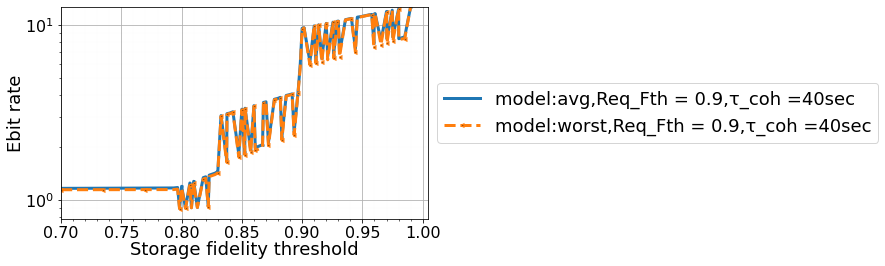

In [32]:

scheme_keys = set([])
storage_Fth_values  =set([])
each_scheme_each_coherence_time_all_workloads = {}
each_scheme_each_coherence_time_workloads  ={}

# result_file_path = "../../QSN_results/QSN_resultsv3.csv" #for intermediate edge capacity 300 EPRps
# result_file_path = "../../QSN_results/QSN_resultsv2.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate.csv" #for intermediate edge capacity 100 EPRps

result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate_doceherence_assumption.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate_doceherence_assumption_final.csv" #for intermediate edge capacity 100 EPRps

with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = float(line[6])
        objective_value = float(line[7])
        edge_capacity = int(line[8])
        decoherence_assumption = line[11]
#         print(τ_coh)
#         print("objective_value",objective_value)
        
        if  ( t_max in [20] and request_fidelity_threshold in [0.9]  and 
             
              edge_capacity in [200] and delta in [10.693877551020408] and storage_capacity in [1000] and τ_coh in [40]
            ):
            scheme = "model:"+str(decoherence_assumption)+",Req_Fth = "+str(request_fidelity_threshold)+",τ_coh ="+str(int(τ_coh))+"sec"
            try:
                each_scheme_each_coherence_time_workloads[scheme][storage_block_threshold].append(objective_value)
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme][storage_block_threshold]= [objective_value]
                except:
                    each_scheme_each_coherence_time_workloads[scheme]={}
                    each_scheme_each_coherence_time_workloads[scheme][storage_block_threshold]=[objective_value]
                    
            if scheme not in scheme_keys:
                scheme_keys.add(scheme)
            storage_Fth_values.add(storage_block_threshold)
#             scheme2 = "No storage,"+"Req_Fth = "+str(request_fidelity_threshold)
#             no_storage_ebit_rate = 2.646706339208193
#             no_storage_ebit_rate = 0.8822354464027311
#             try:
#                 each_scheme_each_coherence_time_workloads[scheme2][storage_block_threshold].append(no_storage_ebit_rate)
#             except:
#                 try:
#                     each_scheme_each_coherence_time_workloads[scheme2][storage_block_threshold]= [no_storage_ebit_rate]
#                 except:
#                     each_scheme_each_coherence_time_workloads[scheme2]={}
#                     each_scheme_each_coherence_time_workloads[scheme2][storage_block_threshold]=[no_storage_ebit_rate]
         
            
#             if scheme2 not in scheme_keys:
#                 scheme_keys.add(scheme2)


selected_values = []
each_scheme_each_coherence_time_workloads_percentage = {}
for scheme,τ_coh_value_satisfied_number in each_scheme_each_coherence_time_workloads.items():
    for τ_coh,values in τ_coh_value_satisfied_number.items():
        
        avg_EGR = sum(values)/len(values)
        try:
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh] = avg_EGR
        except:
            each_scheme_each_coherence_time_workloads_percentage[scheme]  ={}
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh]=avg_EGR
        selected_values.append(avg_EGR)
        
        
storage_Fth_values = list(storage_Fth_values)
storage_Fth_values.sort()
scheme_keys = list(scheme_keys)
scheme_keys.sort()
ploting_simple_y_as_x("Storage fidelity threshold","Ebit rate",
                        18, 18, 16,
                      16, 0, 0,
                      min(storage_Fth_values),0,False,[],max(selected_values),
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      storage_Fth_values,storage_Fth_values,
                      True,True,True,1,18,
                      "plots/QSN_repeater_chain_ebit_as_storage_Fth.pdf",True,2,12.4,3.8,True)

In [ ]:
for path 0 storage Fth 0.7 we need 225.61377433967078 
for path 1 storage Fth 0.7 we need 7.066119011013378 
for path 2 storage Fth 0.7 we need 85.24166971024741 



In [ ]:
import numpy as np
storage_block_thresholds = np.linspace(0.7,0.7,1)
print(storage_block_thresholds)

In [ ]:
# plotting 3D Ebit rate as coherence and delta time

# With storage capacity 400 and 1000

# with intermediate edge capacity 200 and 400

τ_coh_values  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]
delta_values [1.0, 1.183673469387755, 1.3673469387755102, 1.3877551020408163, 1.5510204081632653, 1.7346938775510203, 1.7755102040816326, 1.9183673469387754, 2.1020408163265305, 2.163265306122449, 2.2857142857142856, 2.4693877551020407, 2.5510204081632653, 2.6530612244897958, 2.836734693877551, 2.9387755102040813, 3.0204081632653064, 3.2040816326530615, 3.326530612244898, 3.3877551020408165

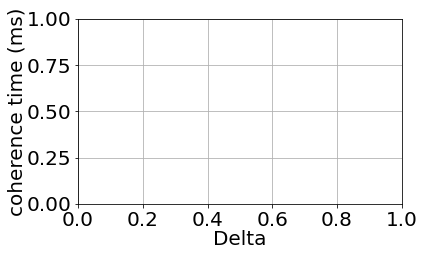

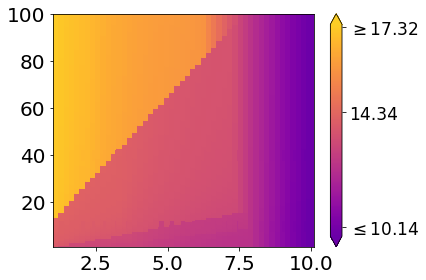

In [35]:
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate_doceherence_assumption.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate_doceherence_assumption_final.csv" #for intermediate edge capacity 100 EPRps

each_coh_delata_ebit  ={}
τ_coh_values = []
delta_values = []
            
with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = float(line[6])
        objective_value = float(line[7])
        edge_capacity = int(line[8])
        model = line[11]
        if  ( t_max in [20] and request_fidelity_threshold in [0.9]  and 
             storage_block_threshold in [0.9] and 
           τ_coh <=100 and  delta <= 10 and model in ["avg"] and   edge_capacity in [200] and storage_capacity in [1000]
            ):
            try:
                each_coh_delata_ebit[τ_coh,delta].append(objective_value)
            except:
                each_coh_delata_ebit[τ_coh,delta] = [objective_value]
                    
            if τ_coh not in τ_coh_values:
                τ_coh_values.append(τ_coh)
            if delta not in delta_values:
                delta_values.append(delta)

X = []
Y =[]
Z = []
rate_or_utility_values = []
τ_coh_values.sort()
delta_values.sort()
print("τ_coh_values ",τ_coh_values)
print("delta_values",delta_values)

for delta in delta_values:
    for τ_coh in τ_coh_values:
        if (τ_coh,delta) in each_coh_delata_ebit:
            ebits = each_coh_delata_ebit[τ_coh,delta]
            avg_ebits = sum(ebits)/len(ebits)
            X.append(delta)
            Y.append(τ_coh)
            Z.append(avg_ebits)

print("Z ",min(Z),sum(Z)/len(Z),max(Z))
plotting_3D("Delta","coherence time (ms)","Ebit rate",
                          20, 20, 20,
                          20, 0, 0,
                          0,0,
                          500,
                          X,Y,Z,round(min(Z),2),round(round(sum(Z)/len(Z),2)+0.4,2),round(max(Z),2),
                          False,True,
                          False,1,
                          24,"plots/3D_delta_coherence_ebit_rate.pdf",
                          False,3,6,3.6)

In [ ]:
import numpy as np
τ_coh_list = np.linspace(1,2,40)
print(τ_coh_list)

In [ ]:
# -*- coding: utf-8 -*-
"""HW1.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Y6bs0pAuzSveY8svvbR7zr0l9c-eZCkl
"""

# Assuming bias=False reduces the parameter count in Conv2d layers

# Convolutional layers parameters (without bias)
# Updated counts based on the provided structure
conv_params_corrected = (3**2 * 3 * 64) + (3**2 * 64 * 128) + (3**2 * 128 * 256) + (3**2 * 256 * 256) + \
                        (3**2 * 256 * 512) + (3**2 * 512 * 512) * 3

# Batch Normalization layers parameters
# There are 8 BN layers, each corresponding to the output channels of Conv layers
bn_params_corrected = 2 * (64 + 128 + 2*256 + 4*512)

# Fully Connected layer parameters (correcting for including bias this time)
fc_params_corrected = 512 * 10 + 10  # Including bias

# Total parameters corrected
total_params_corrected = conv_params_corrected + bn_params_corrected + fc_params_corrected
total_params_corrected

In [ ]:
scheme_keys = ["AQM","Without AQM"]
τ_coh_values = [i for i in range(1000)]
each_scheme_each_coherence_time_workloads_percentage = {}
ploting_simple_y_as_x("Time (ms)","e2e fidelity",
                        22, 22, 20,
                      20, 0, 0,
                      0,0,False,[],max([1]),
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      False,True,True,1,20,
                      "plots/AQM_e2e_f.pdf",True,2,6.4,3.8,False)

In [ ]:
scheme_keys = ["AQM","Without AQM"]
τ_coh_values = [i for i in range(1000)]
each_scheme_each_coherence_time_workloads_percentage = {}
ploting_simple_y_as_x("Number of flows","Avg request service \n delay (ms)",
                        22, 22, 20,
                      20, 0, 0,
                      0,0,False,[],max([1000]),
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      False,True,True,1,20,
                      "plots/AQM_queue_delay.pdf",True,2,6.4,3.8,False)

In [ ]:
scheme_keys = ["AQM","Without AQM"]
τ_coh_values = [i for i in range(1000)]
each_scheme_each_coherence_time_workloads_percentage = {}
ploting_simple_y_as_x("Number of flows","Drop rate",
                        22, 22, 20,
                      20, 0, 0,
                      0,0,False,[],max([1]),
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      False,True,True,1,20,
                      "plots/AQM_drop_rate.pdf",True,2,6.4,3.8,False)